In [1]:
import pandas as pd 

#Veri yükleme
df = pd.read_csv("USvideos.csv")

#Kullanacağımız sütunları seçme
df = df[['views', 'likes', 'dislikes', 'comment_count']]

#Eksik veri temizliği
df = df.dropna()

print(df.head())





     views   likes  dislikes  comment_count
0   748374   57527      2966          15954
1  2418783   97185      6146          12703
2  3191434  146033      5339           8181
3   343168   10172       666           2146
4  2095731  132235      1989          17518


In [2]:
#Eğitim ve test verisine ayırma
from sklearn.model_selection import train_test_split

x = df[['likes', 'dislikes', 'comment_count']] #Bağımsız değişken
y = df[['views']] #Hedef değişken

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [3]:
#Linear regresyon modeli kurma
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [4]:
from sklearn.metrics import r2_score

y_pred = model.predict(x_test)

#Performans ölçüleri

r2 = r2_score(y_test, y_pred)

print("R2 Skoru:", r2)


R2 Skoru: 0.777503276013677


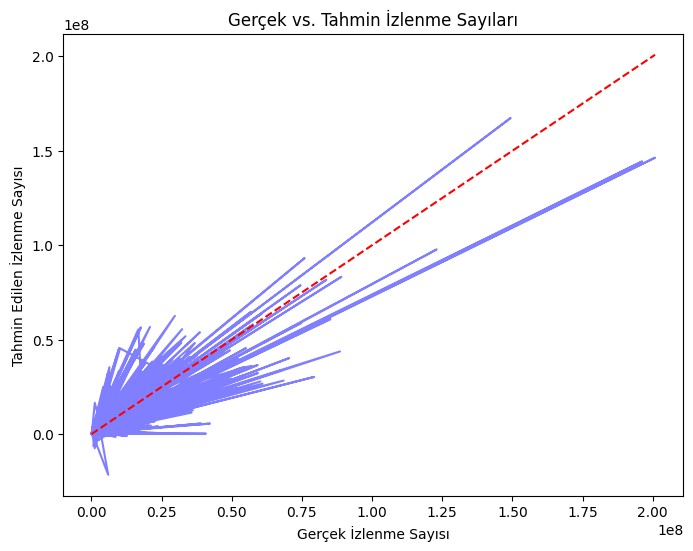

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # y=x referans çizgisi
plt.xlabel("Gerçek İzlenme Sayısı")
plt.ylabel("Tahmin Edilen İzlenme Sayısı")
plt.title("Gerçek vs. Tahmin İzlenme Sayıları")
plt.show()